In [1]:
# Step 1: Import the necessary libraries
import polars as pl
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load the CSV file into a Polars DataFrame
df = pl.read_csv('fmhpi_master_file.csv')

# Step 3: Display the first few rows to inspect the data
df.head(10)

shape: (10, 7)
┌──────┬───────┬──────────┬──────────┬──────────┬───────────┬───────────┐
│ Year ┆ Month ┆ GEO_Type ┆ GEO_Name ┆ GEO_Code ┆ Index_NSA ┆ Index_SA  │
│ ---  ┆ ---   ┆ ---      ┆ ---      ┆ ---      ┆ ---       ┆ ---       │
│ i64  ┆ i64   ┆ str      ┆ str      ┆ str      ┆ f64       ┆ f64       │
╞══════╪═══════╪══════════╪══════════╪══════════╪═══════════╪═══════════╡
│ 1975 ┆ 1     ┆ State    ┆ AK       ┆ .        ┆ 34.268193 ┆ 34.471987 │
│ 1975 ┆ 2     ┆ State    ┆ AK       ┆ .        ┆ 34.822161 ┆ 34.988584 │
│ 1975 ┆ 3     ┆ State    ┆ AK       ┆ .        ┆ 35.38743  ┆ 35.436657 │
│ 1975 ┆ 4     ┆ State    ┆ AK       ┆ .        ┆ 35.969001 ┆ 35.861959 │
│ 1975 ┆ 5     ┆ State    ┆ AK       ┆ .        ┆ 36.598369 ┆ 36.311584 │
│ 1975 ┆ 6     ┆ State    ┆ AK       ┆ .        ┆ 37.275681 ┆ 36.776977 │
│ 1975 ┆ 7     ┆ State    ┆ AK       ┆ .        ┆ 37.947707 ┆ 37.285557 │
│ 1975 ┆ 8     ┆ State    ┆ AK       ┆ .        ┆ 38.547347 ┆ 37.864103 │
│ 1975 ┆ 9     ┆ State    ┆ AK       ┆ .        ┆ 39.051728 ┆ 38.524865 │
│ 1975 ┆ 10    ┆ State    ┆ AK       ┆ .        ┆ 39.490426 ┆ 39.20365  │
└──────┴───────┴──────────┴──────────┴──────────┴───────────┴───────────┘

In [4]:
# Step 4: Combine 'Year' and 'Month' columns into a single 'Date' column
df = df.with_columns(
    (pl.col('Year').cast(pl.Utf8) + "-" + pl.col('Month').cast(pl.Utf8) + "-01").alias('Date')
)

# Step 5: Convert the 'Date' column to datetime
df = df.with_columns(
    pl.col('Date').str.strptime(pl.Date, format="%Y-%m-%d")
)

# Step 6: Sort the data by the 'Date' column
df = df.sort('Date')

# Display the first few rows with the new 'Date' column
df.head(10)

shape: (10, 8)
┌──────┬───────┬──────────┬────────────────────────┬──────────┬───────────┬───────────┬────────────┐
│ Year ┆ Month ┆ GEO_Type ┆ GEO_Name               ┆ GEO_Code ┆ Index_NSA ┆ Index_SA  ┆ Date       │
│ ---  ┆ ---   ┆ ---      ┆ ---                    ┆ ---      ┆ ---       ┆ ---       ┆ ---        │
│ i64  ┆ i64   ┆ str      ┆ str                    ┆ str      ┆ f64       ┆ f64       ┆ date       │
╞══════╪═══════╪══════════╪════════════════════════╪══════════╪═══════════╪═══════════╪════════════╡
│ 1975 ┆ 1     ┆ State    ┆ AK                     ┆ .        ┆ 34.268193 ┆ 34.471987 ┆ 1975-01-01 │
│ 1975 ┆ 1     ┆ State    ┆ AL                     ┆ .        ┆ 35.121632 ┆ 35.190372 ┆ 1975-01-01 │
│ 1975 ┆ 1     ┆ State    ┆ AR                     ┆ .        ┆ 39.893155 ┆ 39.779355 ┆ 1975-01-01 │
│ 1975 ┆ 1     ┆ State    ┆ AZ                     ┆ .        ┆ 28.810954 ┆ 28.800444 ┆ 1975-01-01 │
│ 1975 ┆ 1     ┆ CBSA     ┆ Abilene TX             ┆ 10180    ┆ 45.55842  ┆ 45.527475 ┆ 1975-01-01 │
│ 1975 ┆ 1     ┆ CBSA     ┆ Akron OH               ┆ 10420    ┆ 29.916023 ┆ 29.885165 ┆ 1975-01-01 │
│ 1975 ┆ 1     ┆ CBSA     ┆ Albany GA              ┆ 10500    ┆ 41.674292 ┆ 41.560158 ┆ 1975-01-01 │
│ 1975 ┆ 1     ┆ CBSA     ┆ Albany-Lebanon OR      ┆ 10540    ┆ 20.769088 ┆ 20.731168 ┆ 1975-01-01 │
│ 1975 ┆ 1     ┆ CBSA     ┆ Albany-Schenectady-Tro ┆ 10580    ┆ 36.784378 ┆ 36.74377  ┆ 1975-01-01 │
│      ┆       ┆          ┆ y NY                   ┆          ┆           ┆           ┆            │
│ 1975 ┆ 1     ┆ CBSA     ┆ Albuquerque NM         ┆ 10740    ┆ 28.07928  ┆ 27.978973 ┆ 1975-01-01 │
└──────┴───────┴──────────┴────────────────────────┴──────────┴───────────┴───────────┴────────────┘

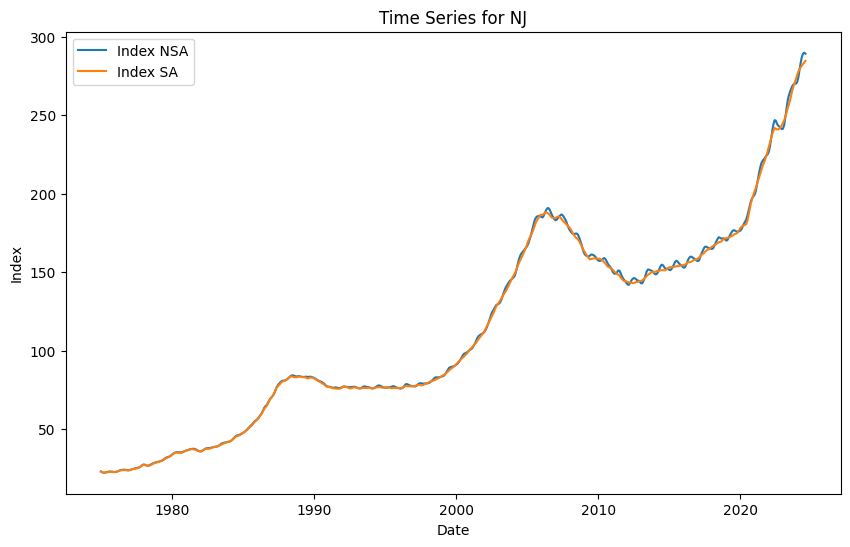

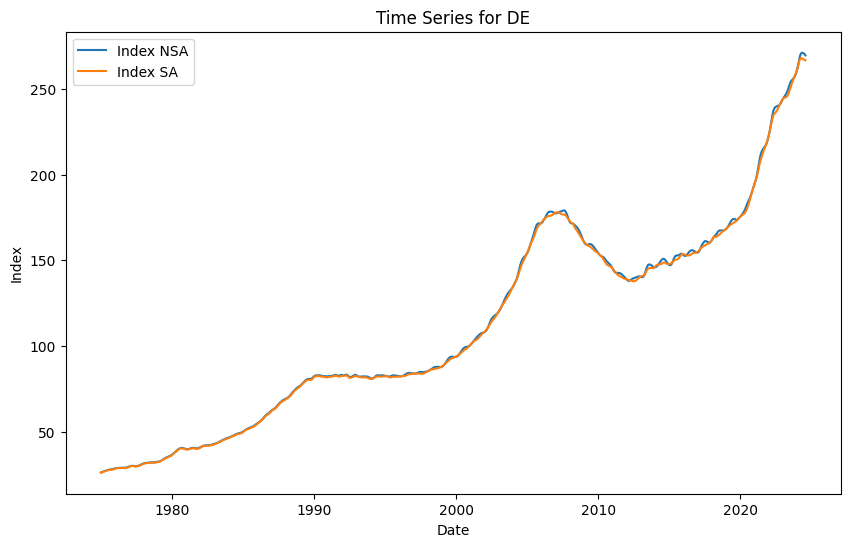

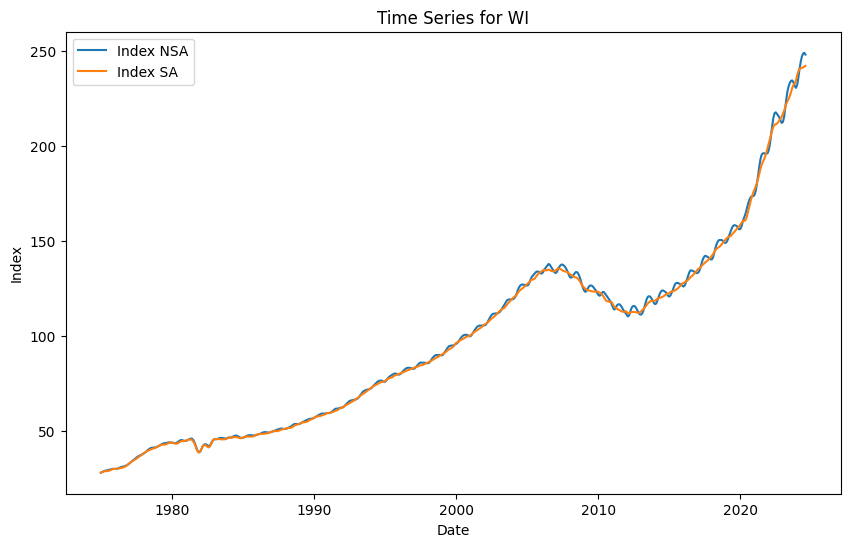

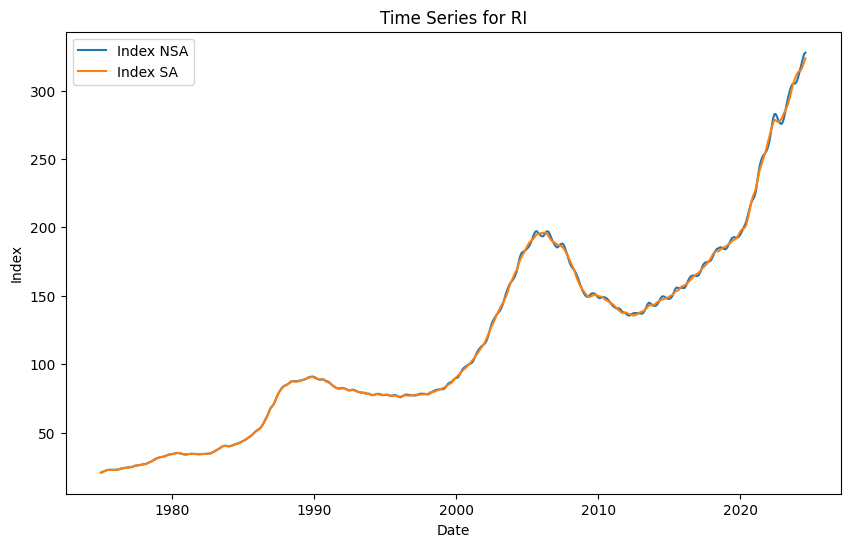

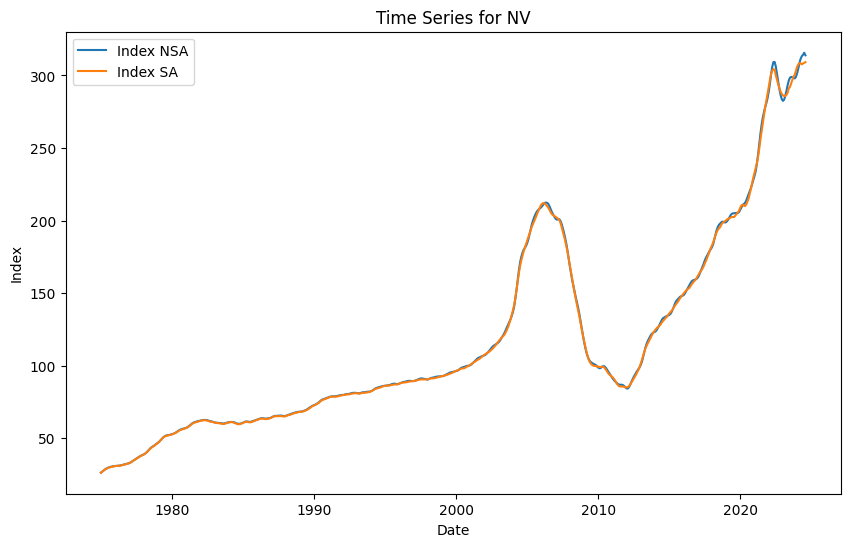

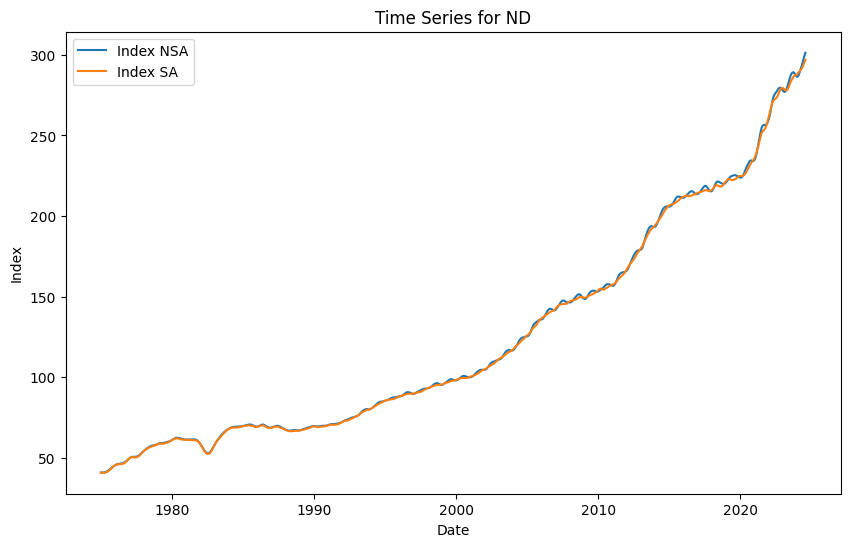

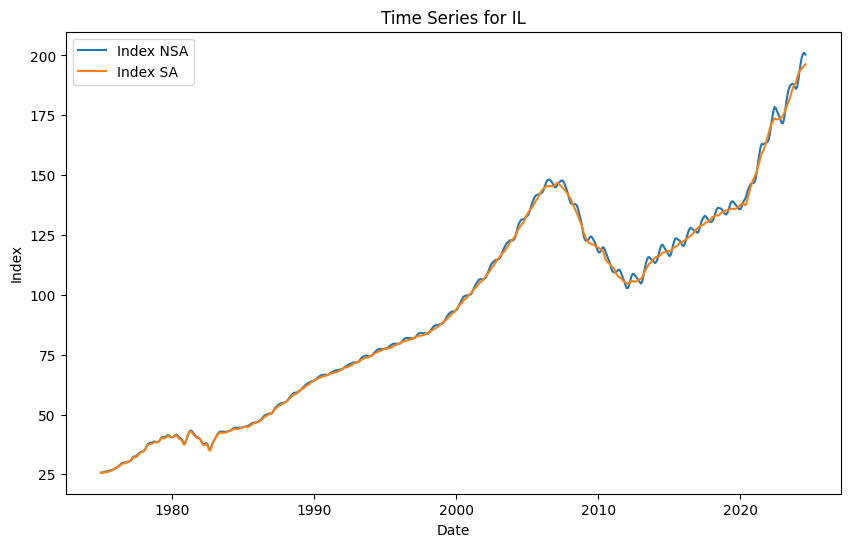

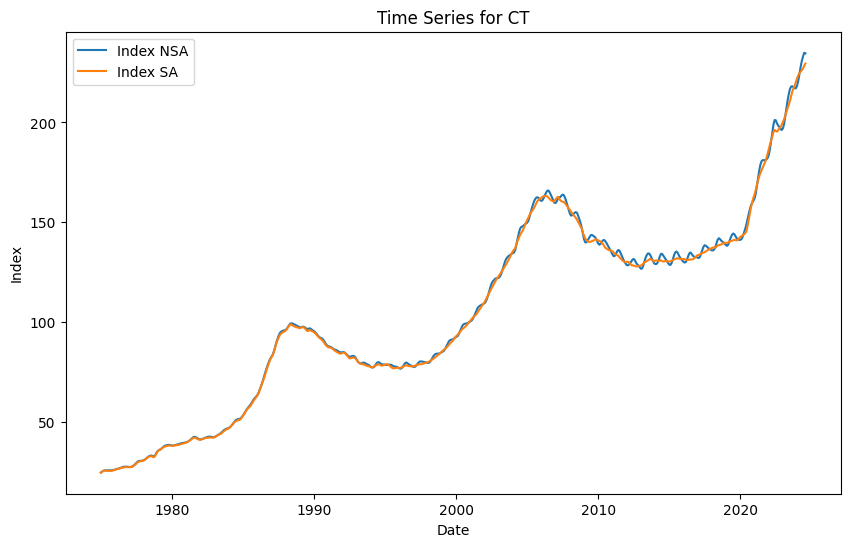

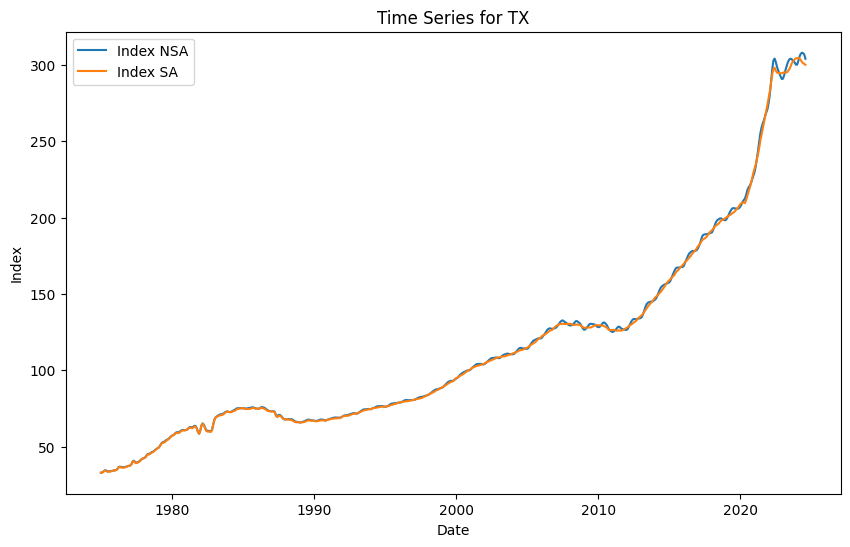

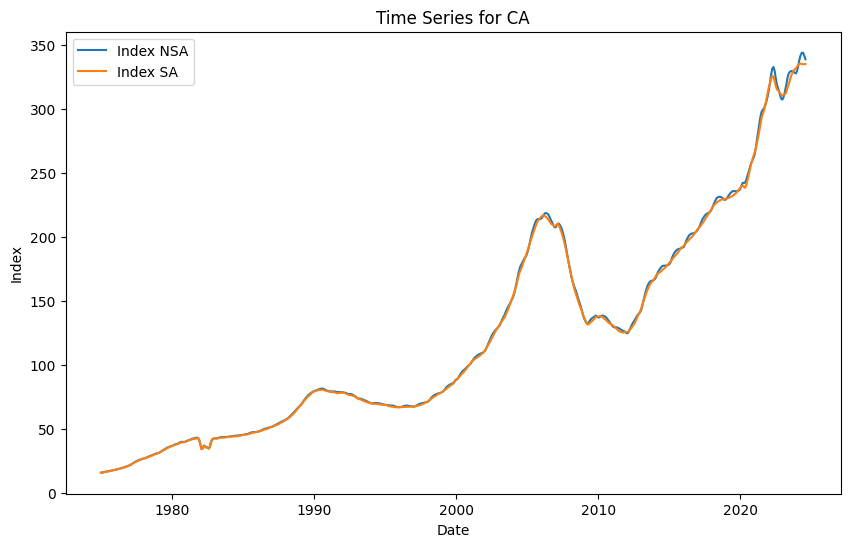

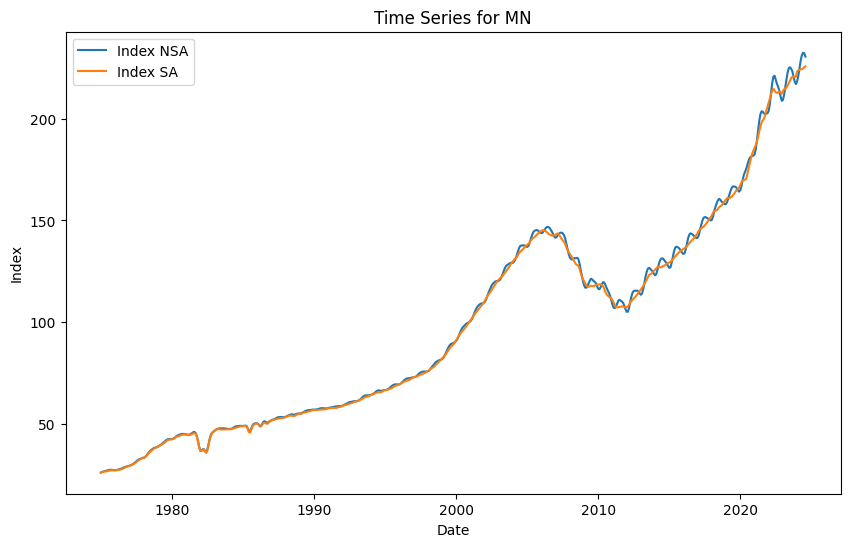

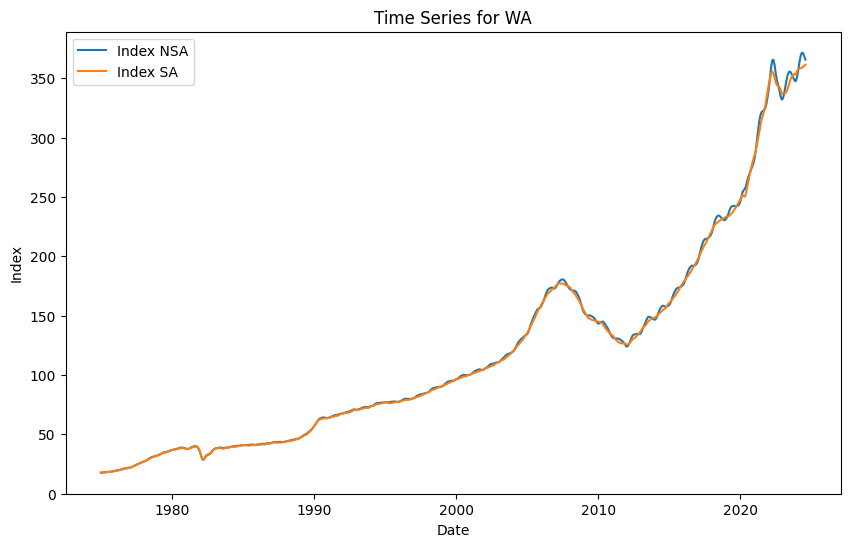

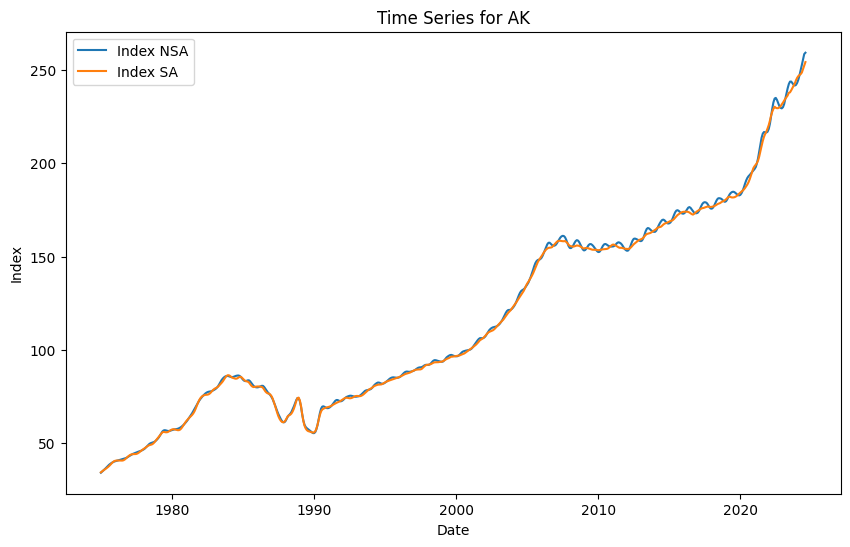

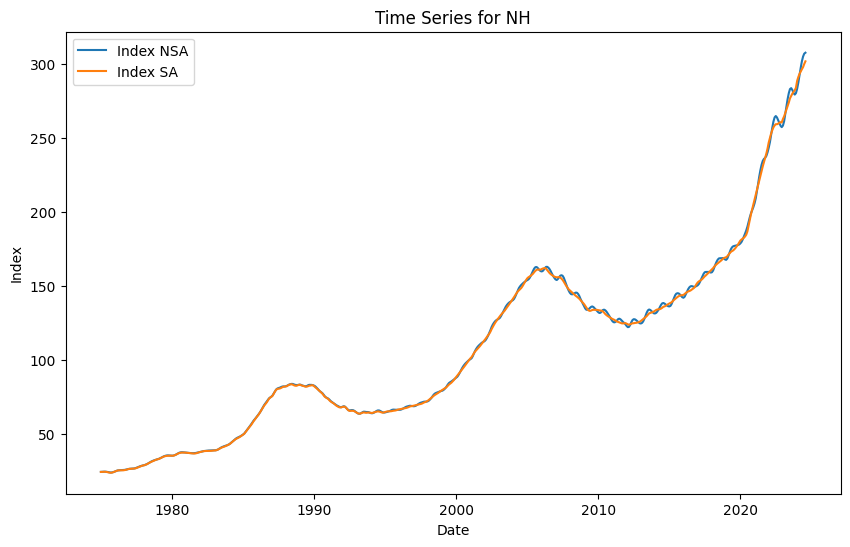

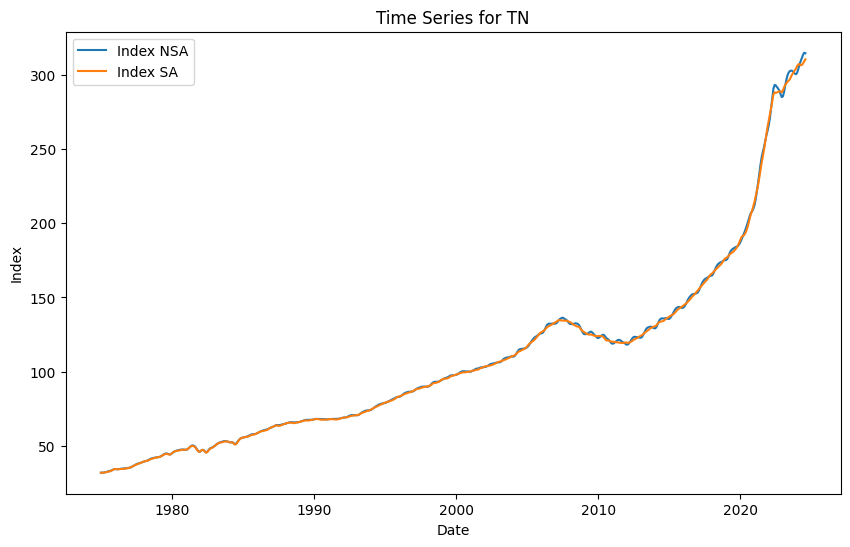

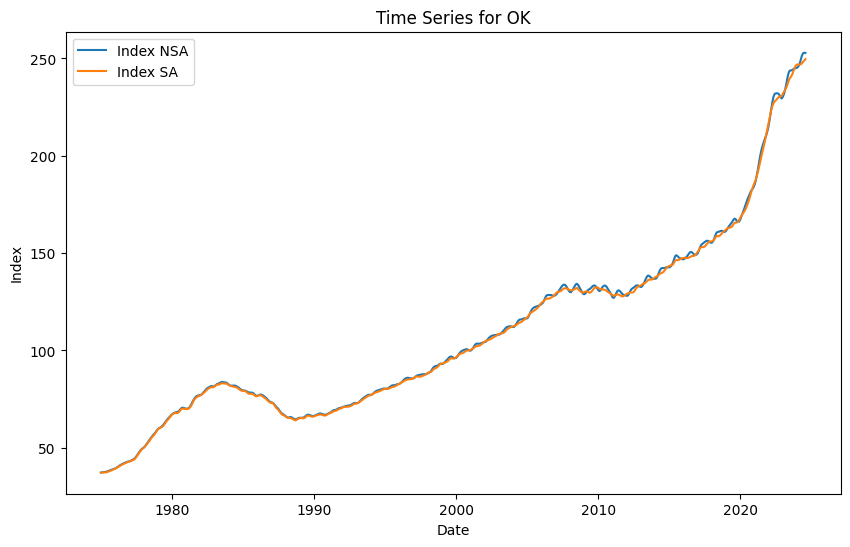

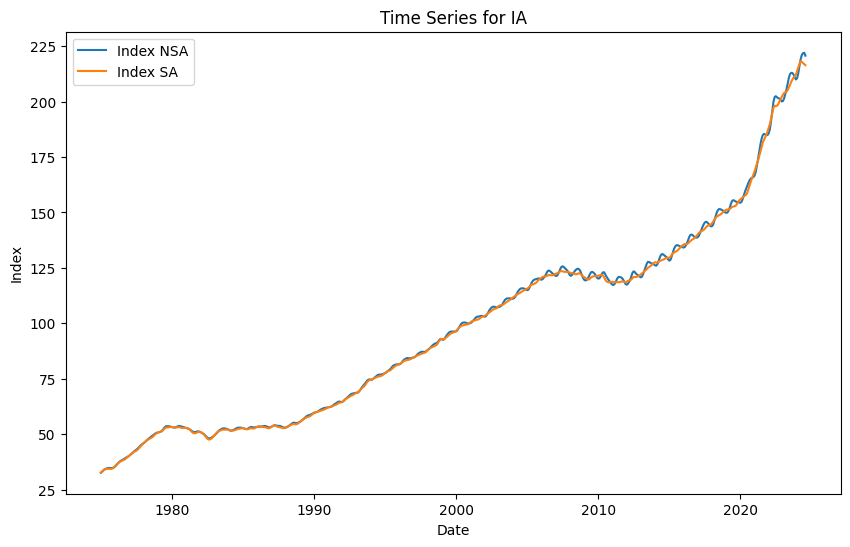

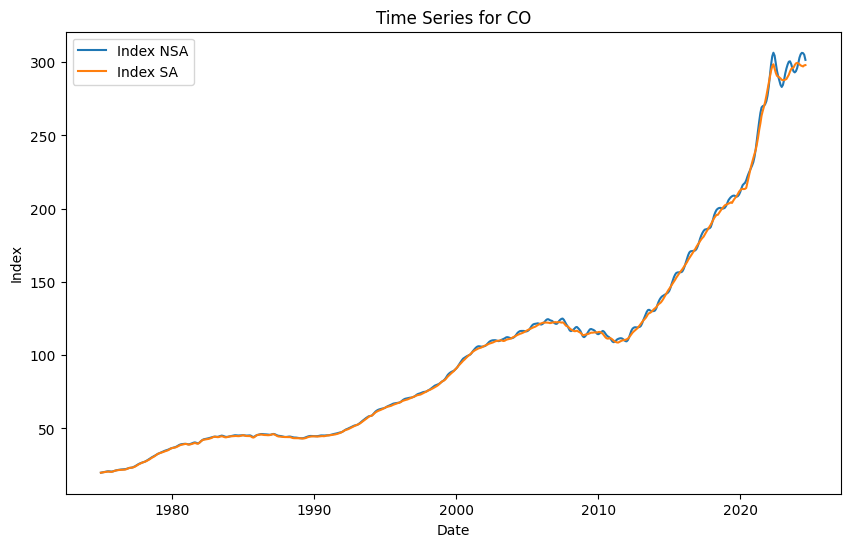

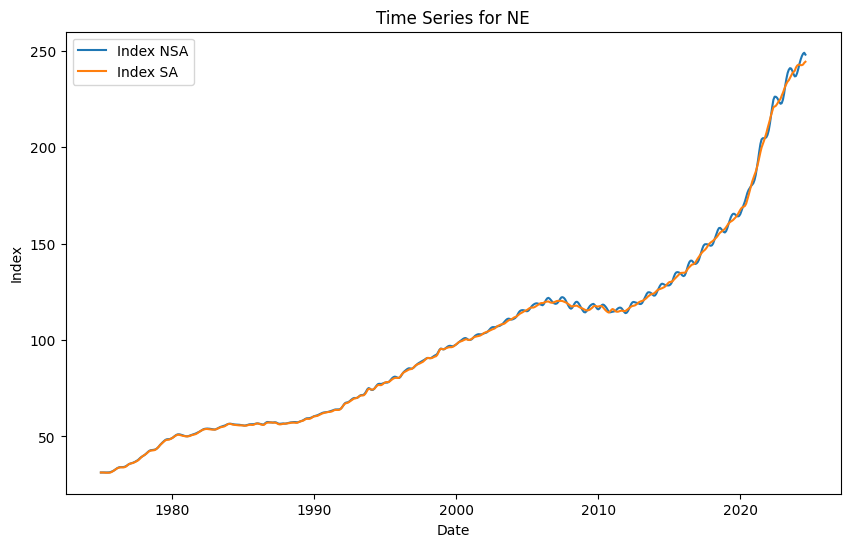

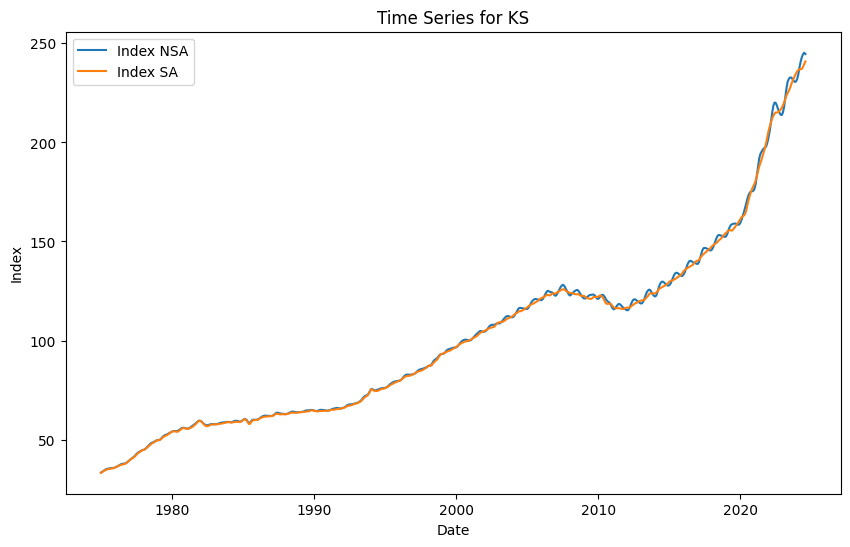

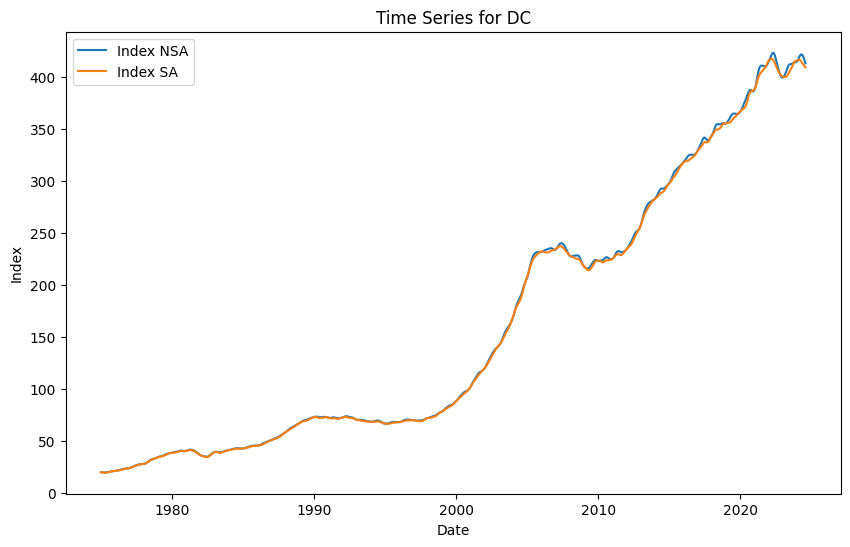

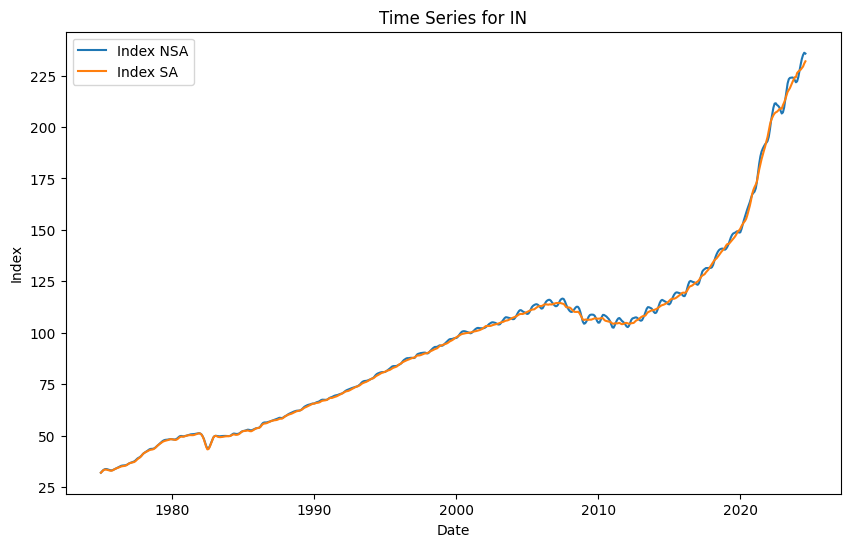

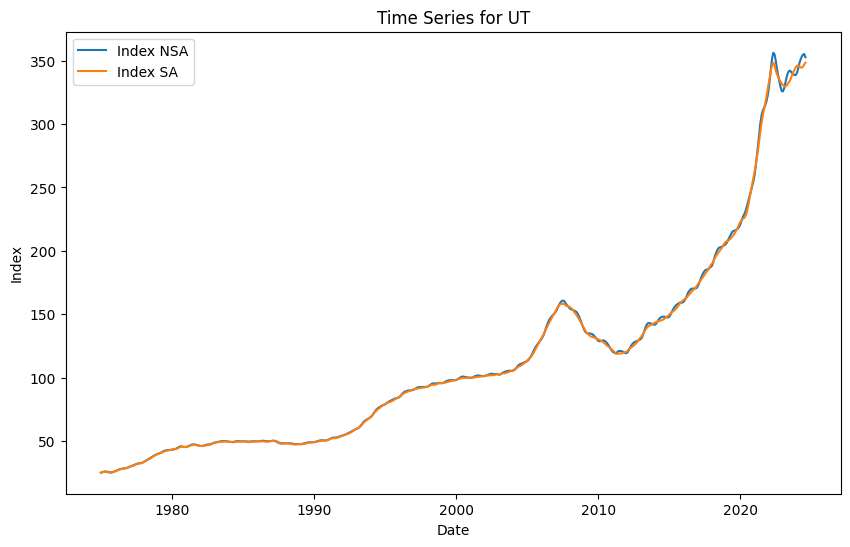

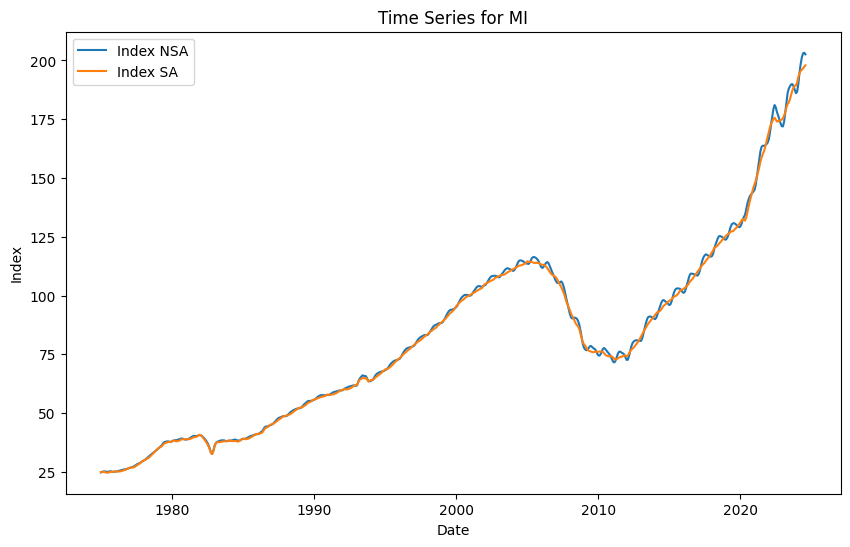

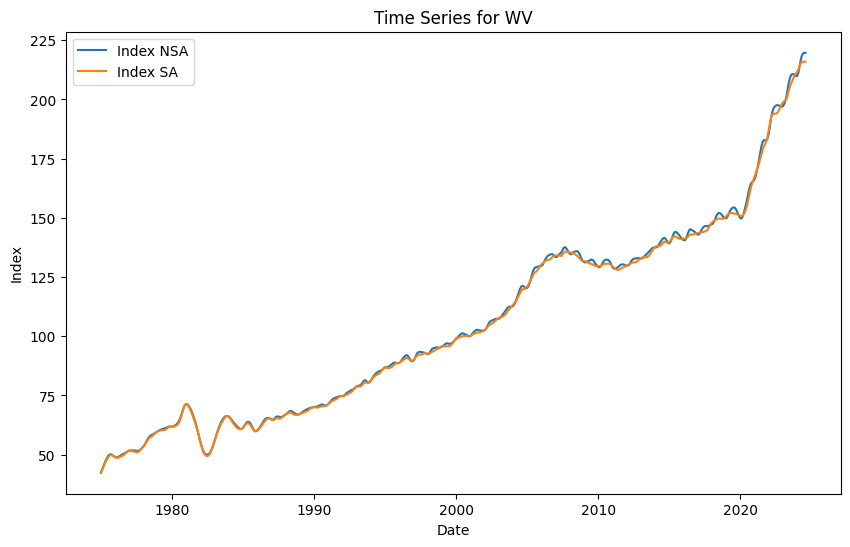

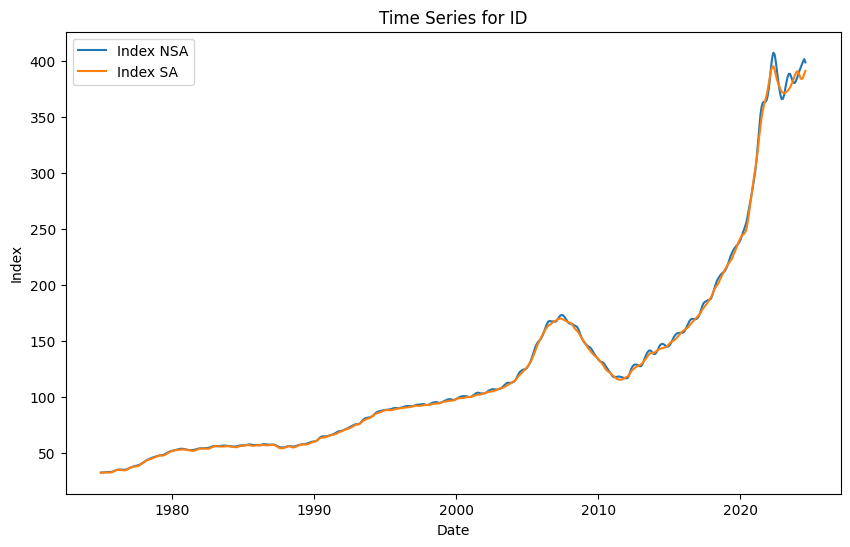

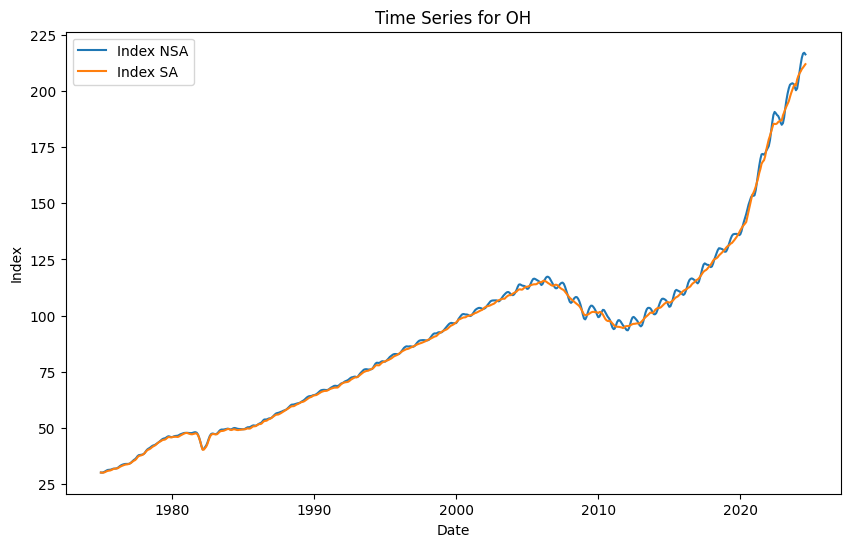

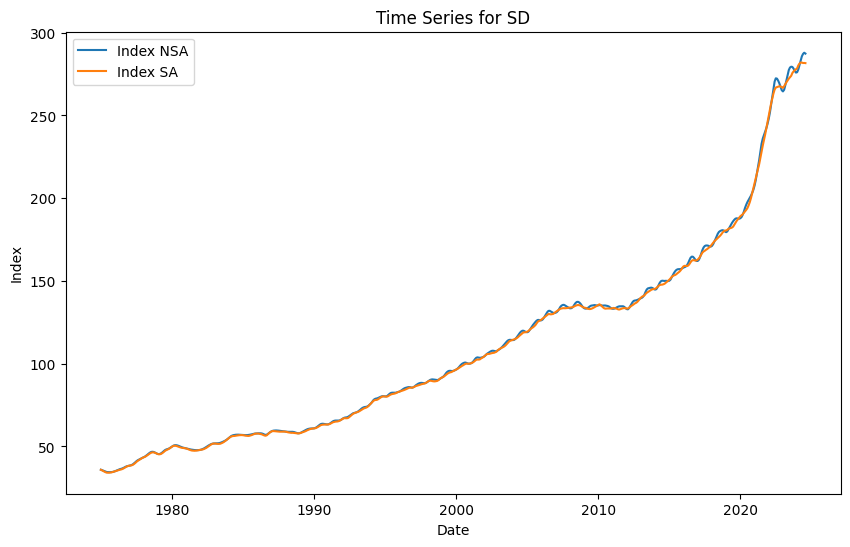

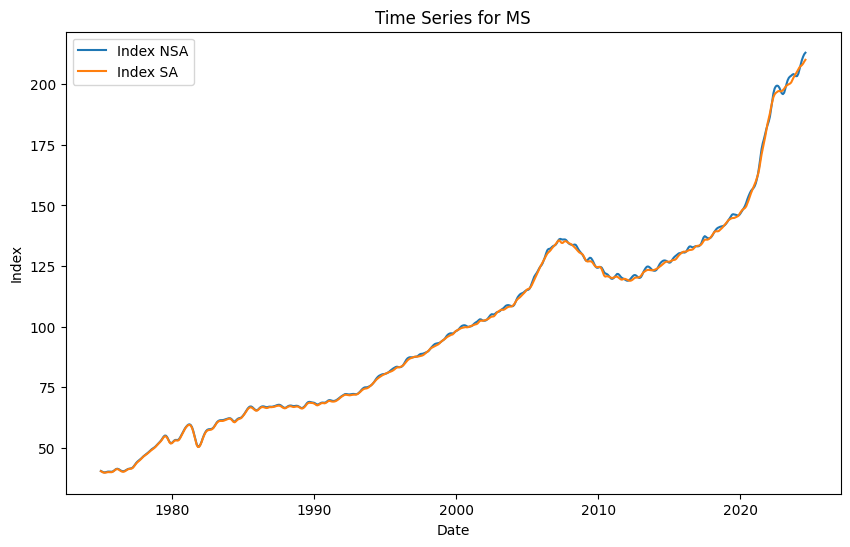

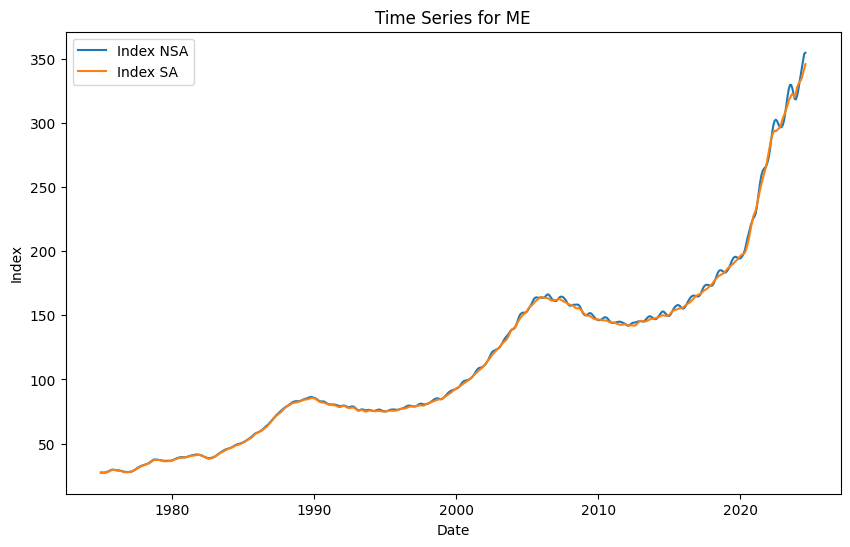

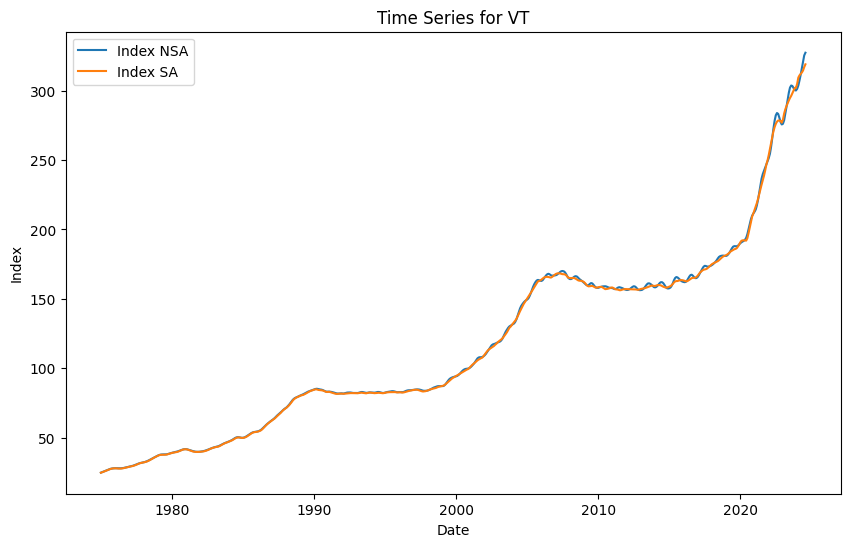

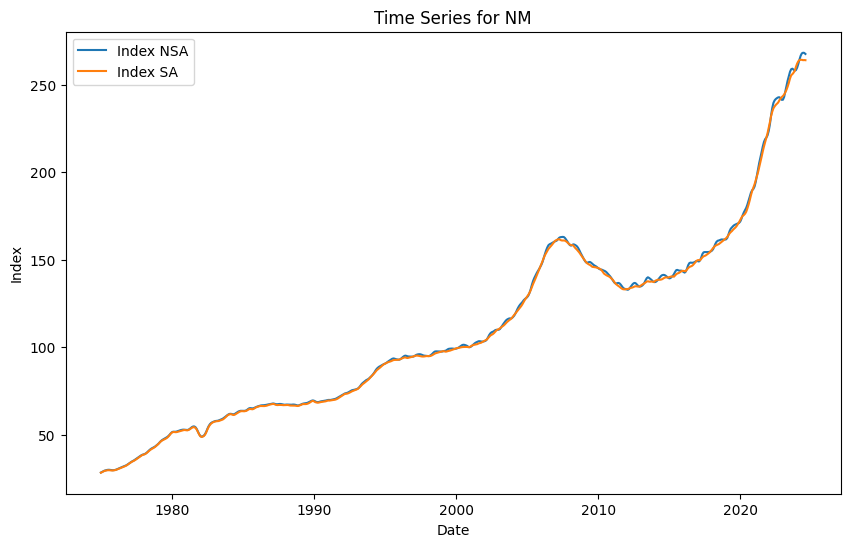

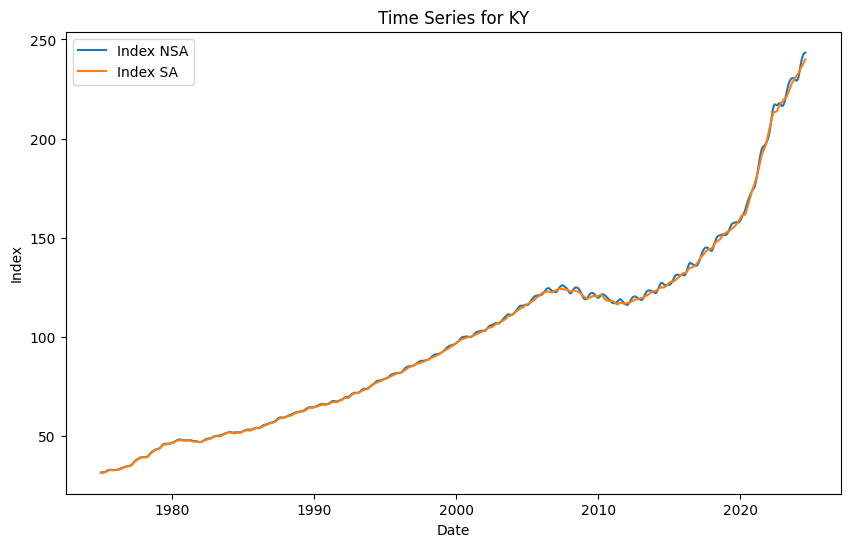

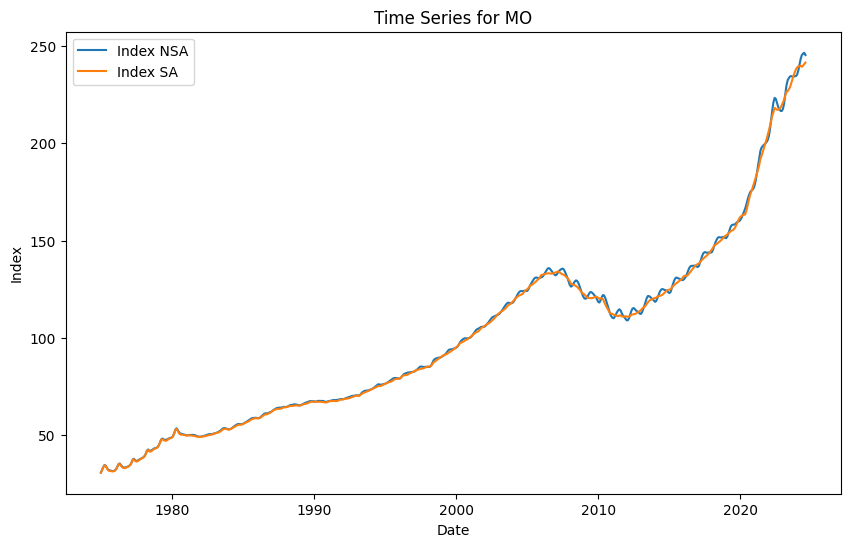

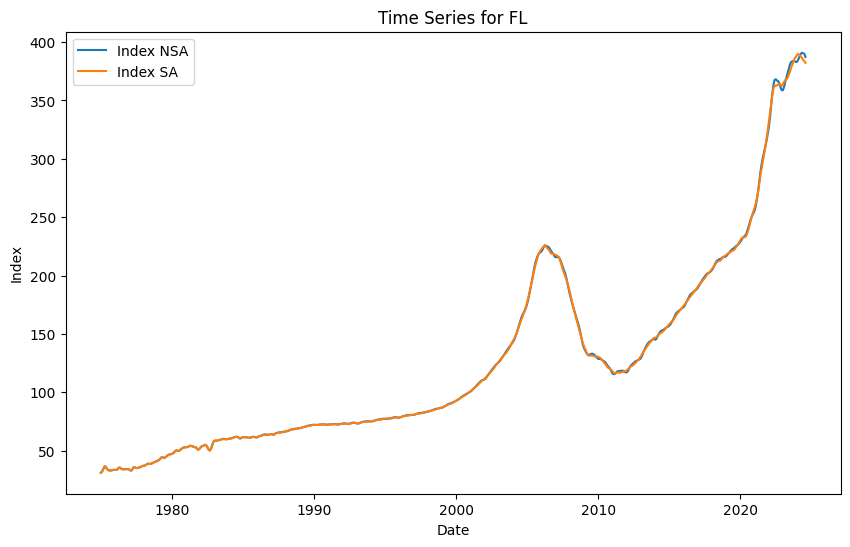

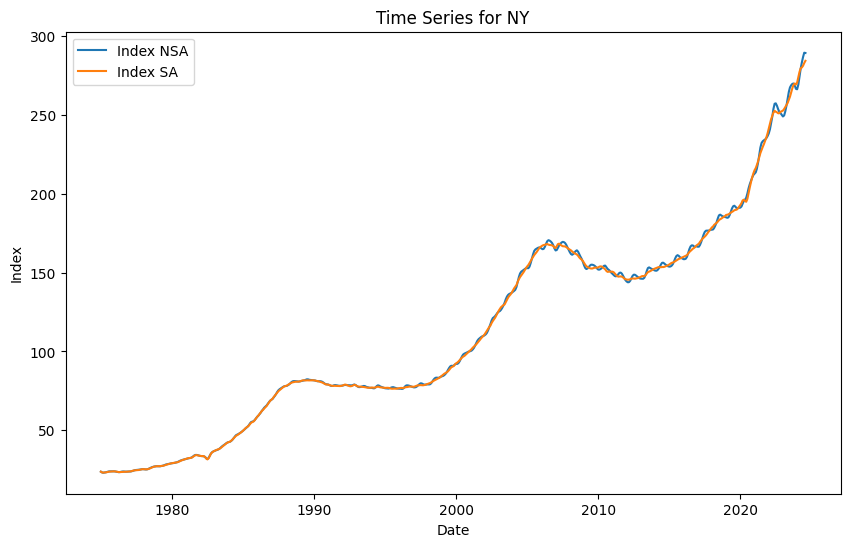

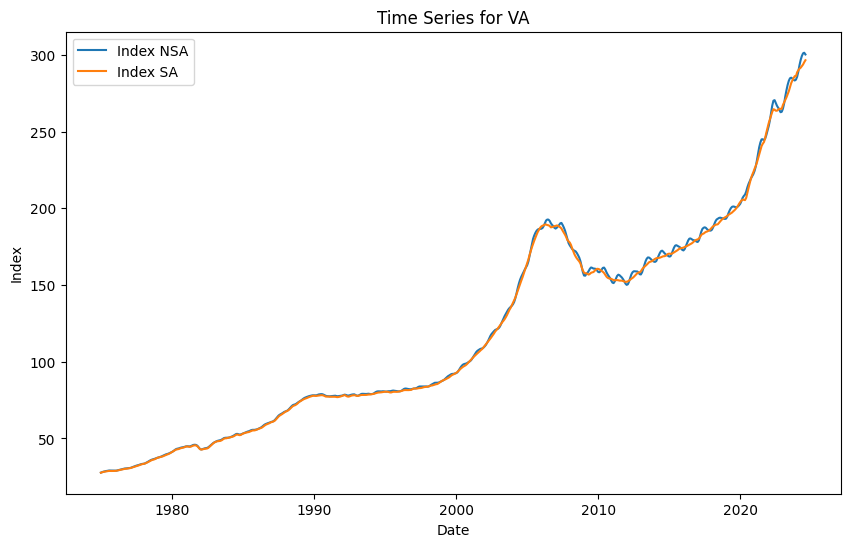

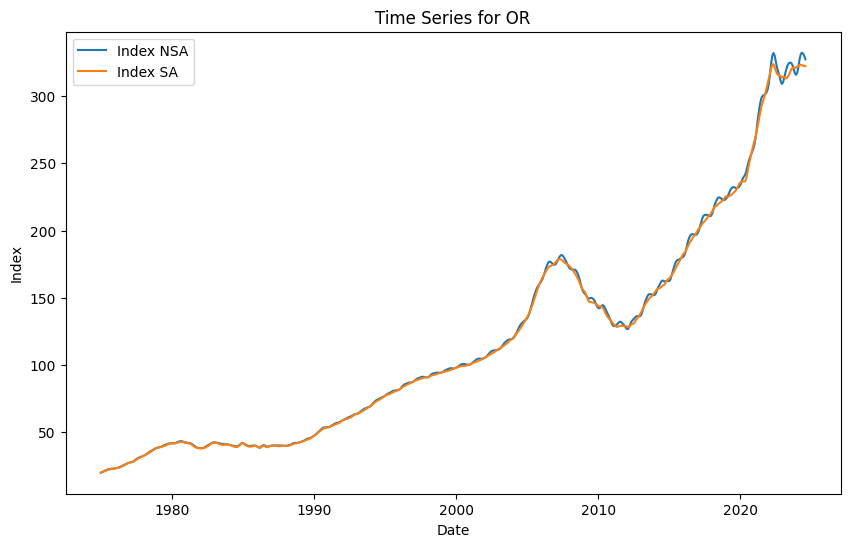

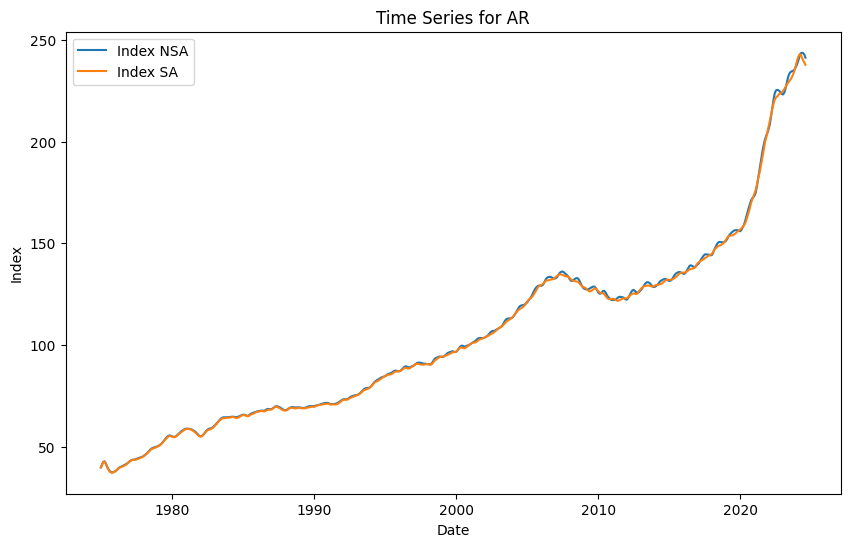

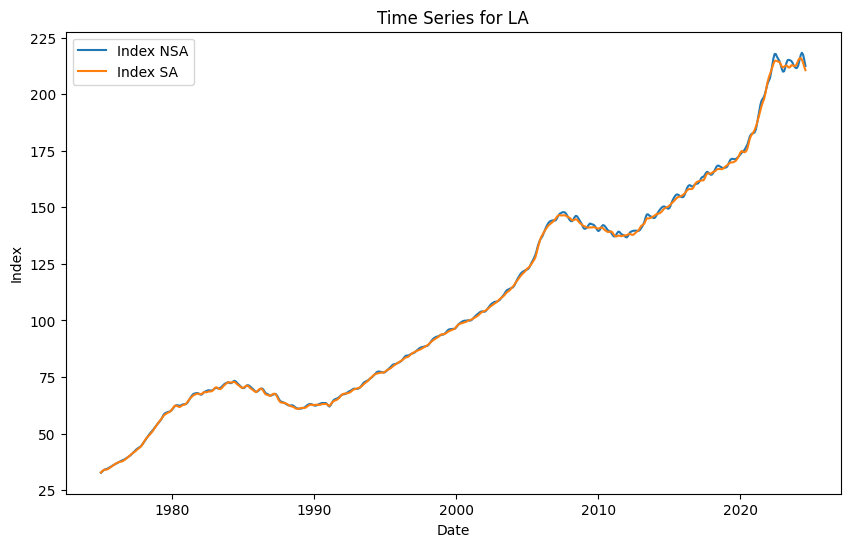

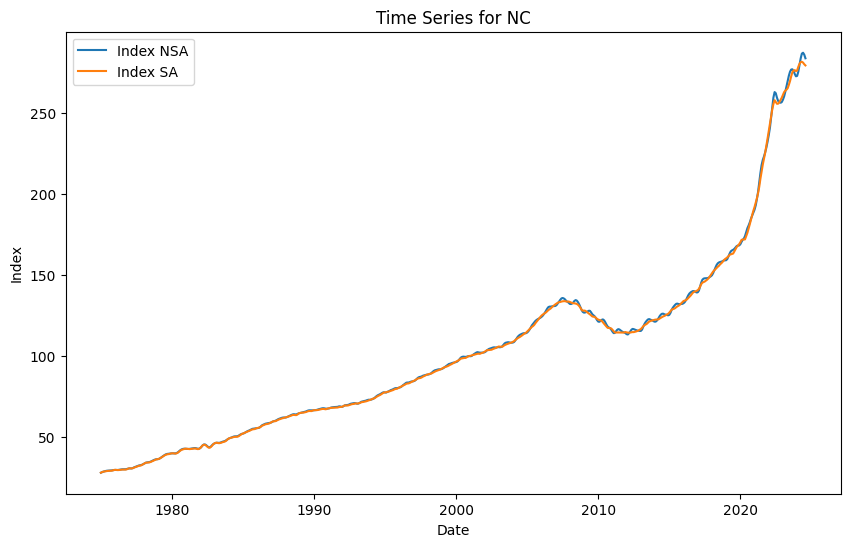

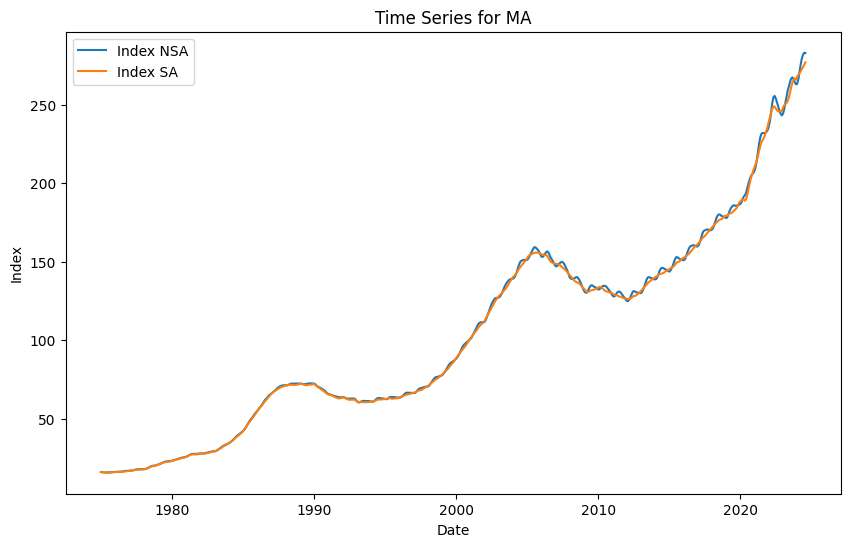

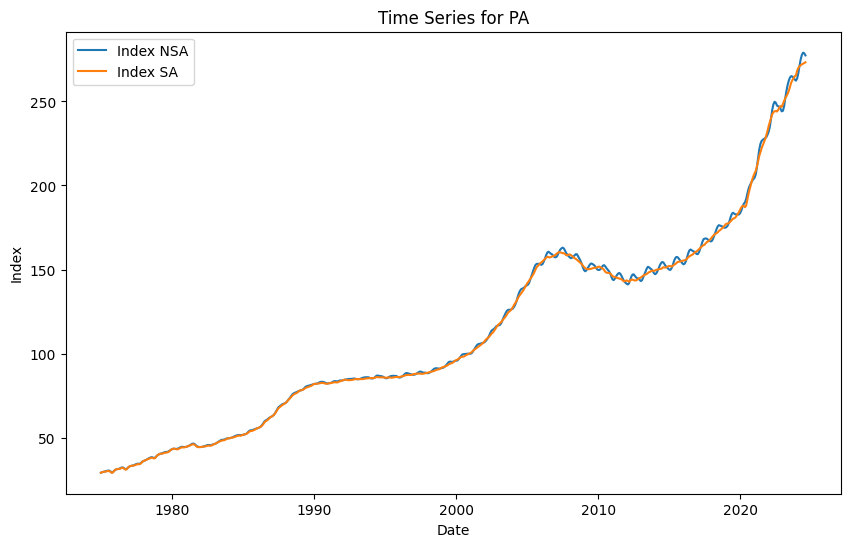

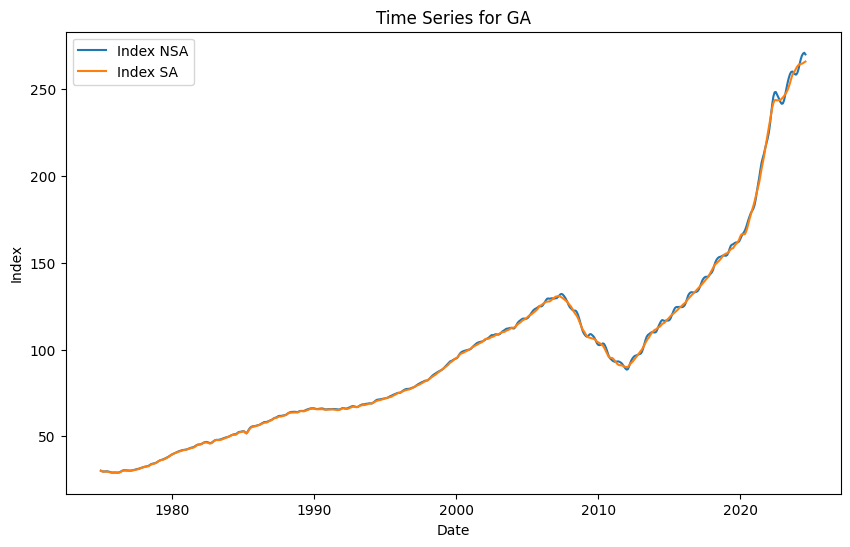

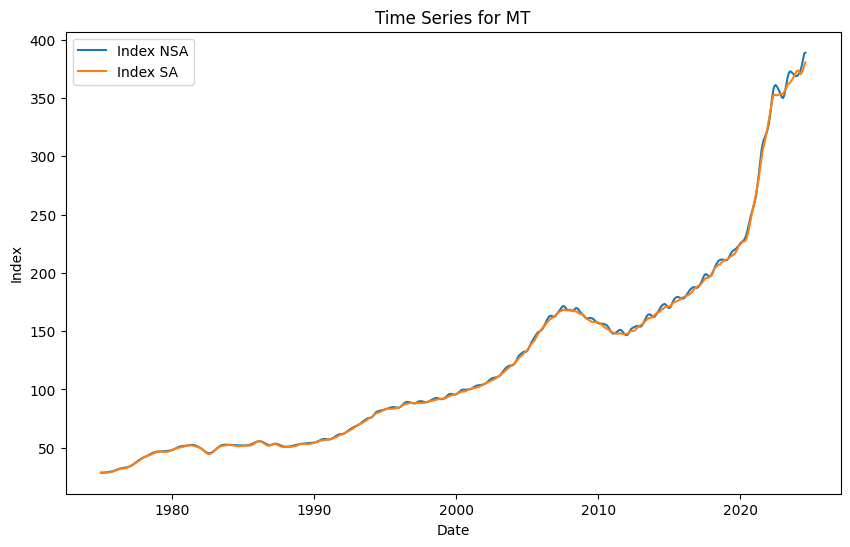

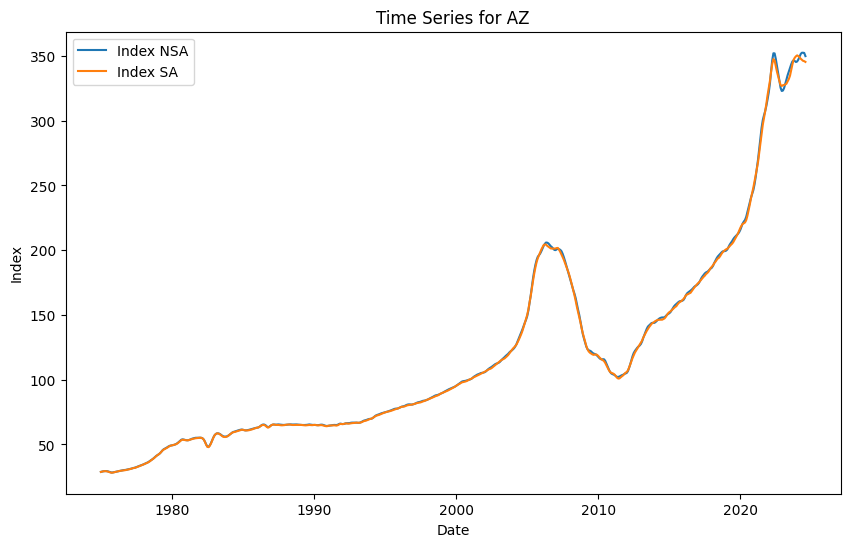

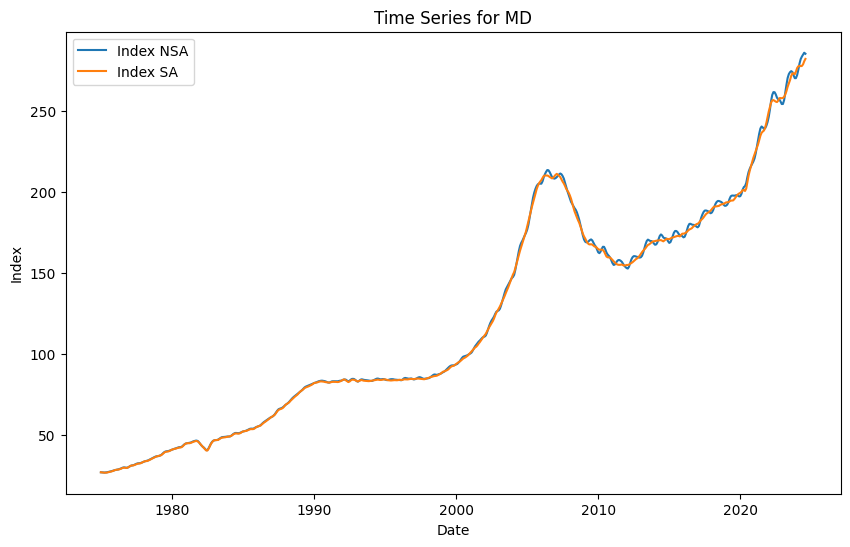

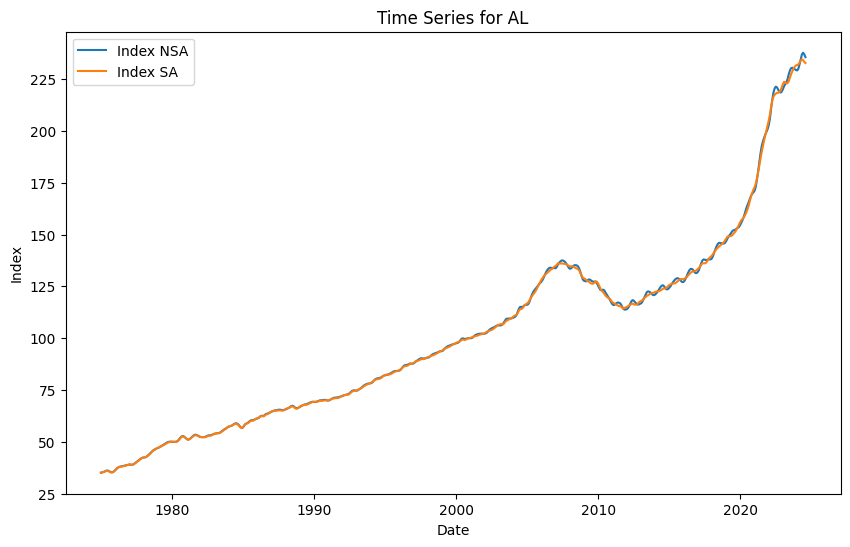

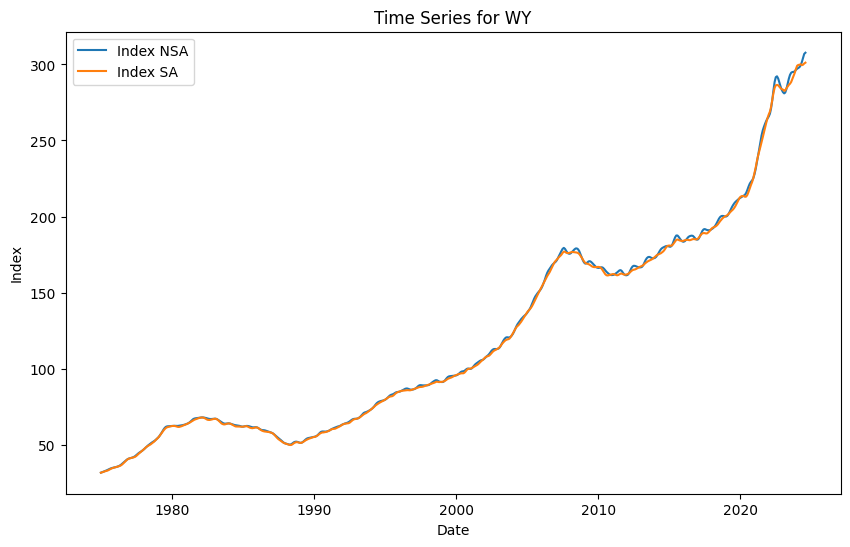

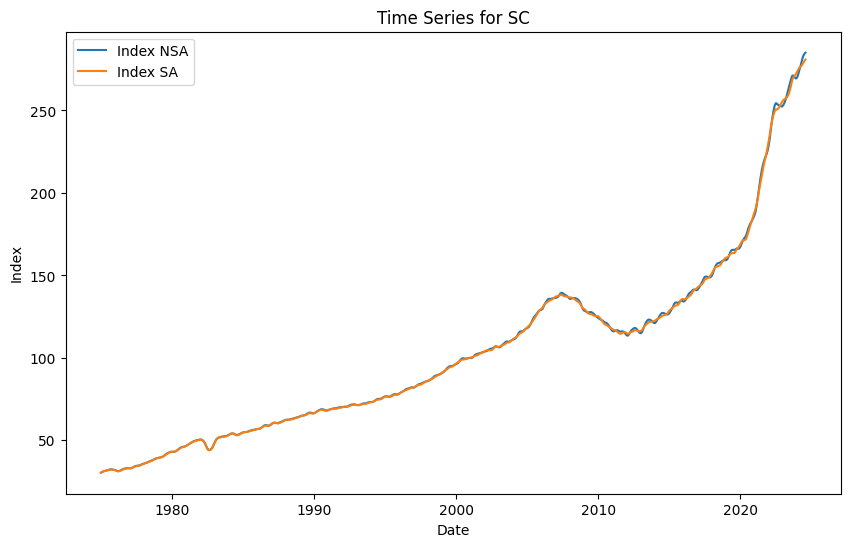

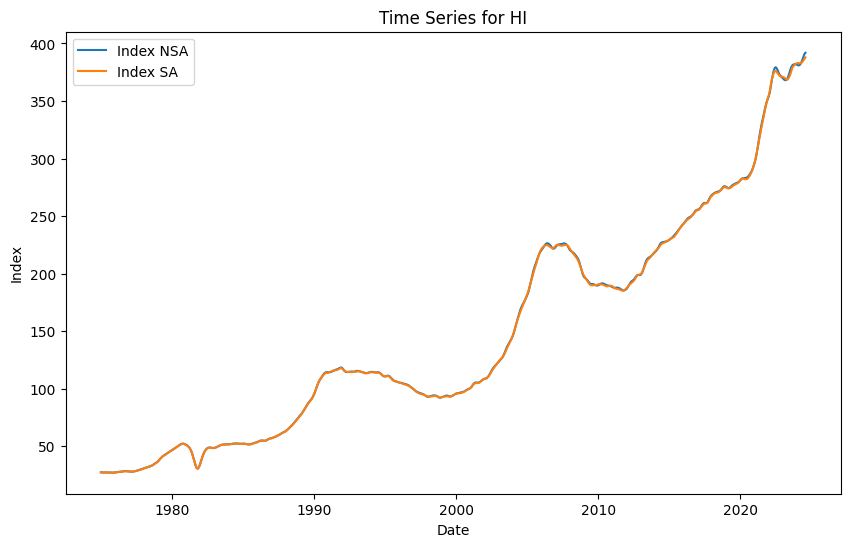

In [6]:
# Step 7: Plot the time series data for each unique GEO_Name
unique_geo_names = geo_filtered.select('GEO_Name').unique()

for geo_name in unique_geo_names['GEO_Name']:
    # Filter data for the specific GEO_Name
    geo_data = geo_filtered.filter(pl.col('GEO_Name') == geo_name)
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    
    plt.plot(geo_data['Date'], geo_data['Index_NSA'], label='Index NSA')
    plt.plot(geo_data['Date'], geo_data['Index_SA'], label='Index SA')
    
    # Set the title and labels
    plt.title(f"Time Series for {geo_name}")
    plt.xlabel('Date')
    plt.ylabel('Index')
    
    # Show legend
    plt.legend(loc='upper left')
    
    # Display the plot
    plt.show()


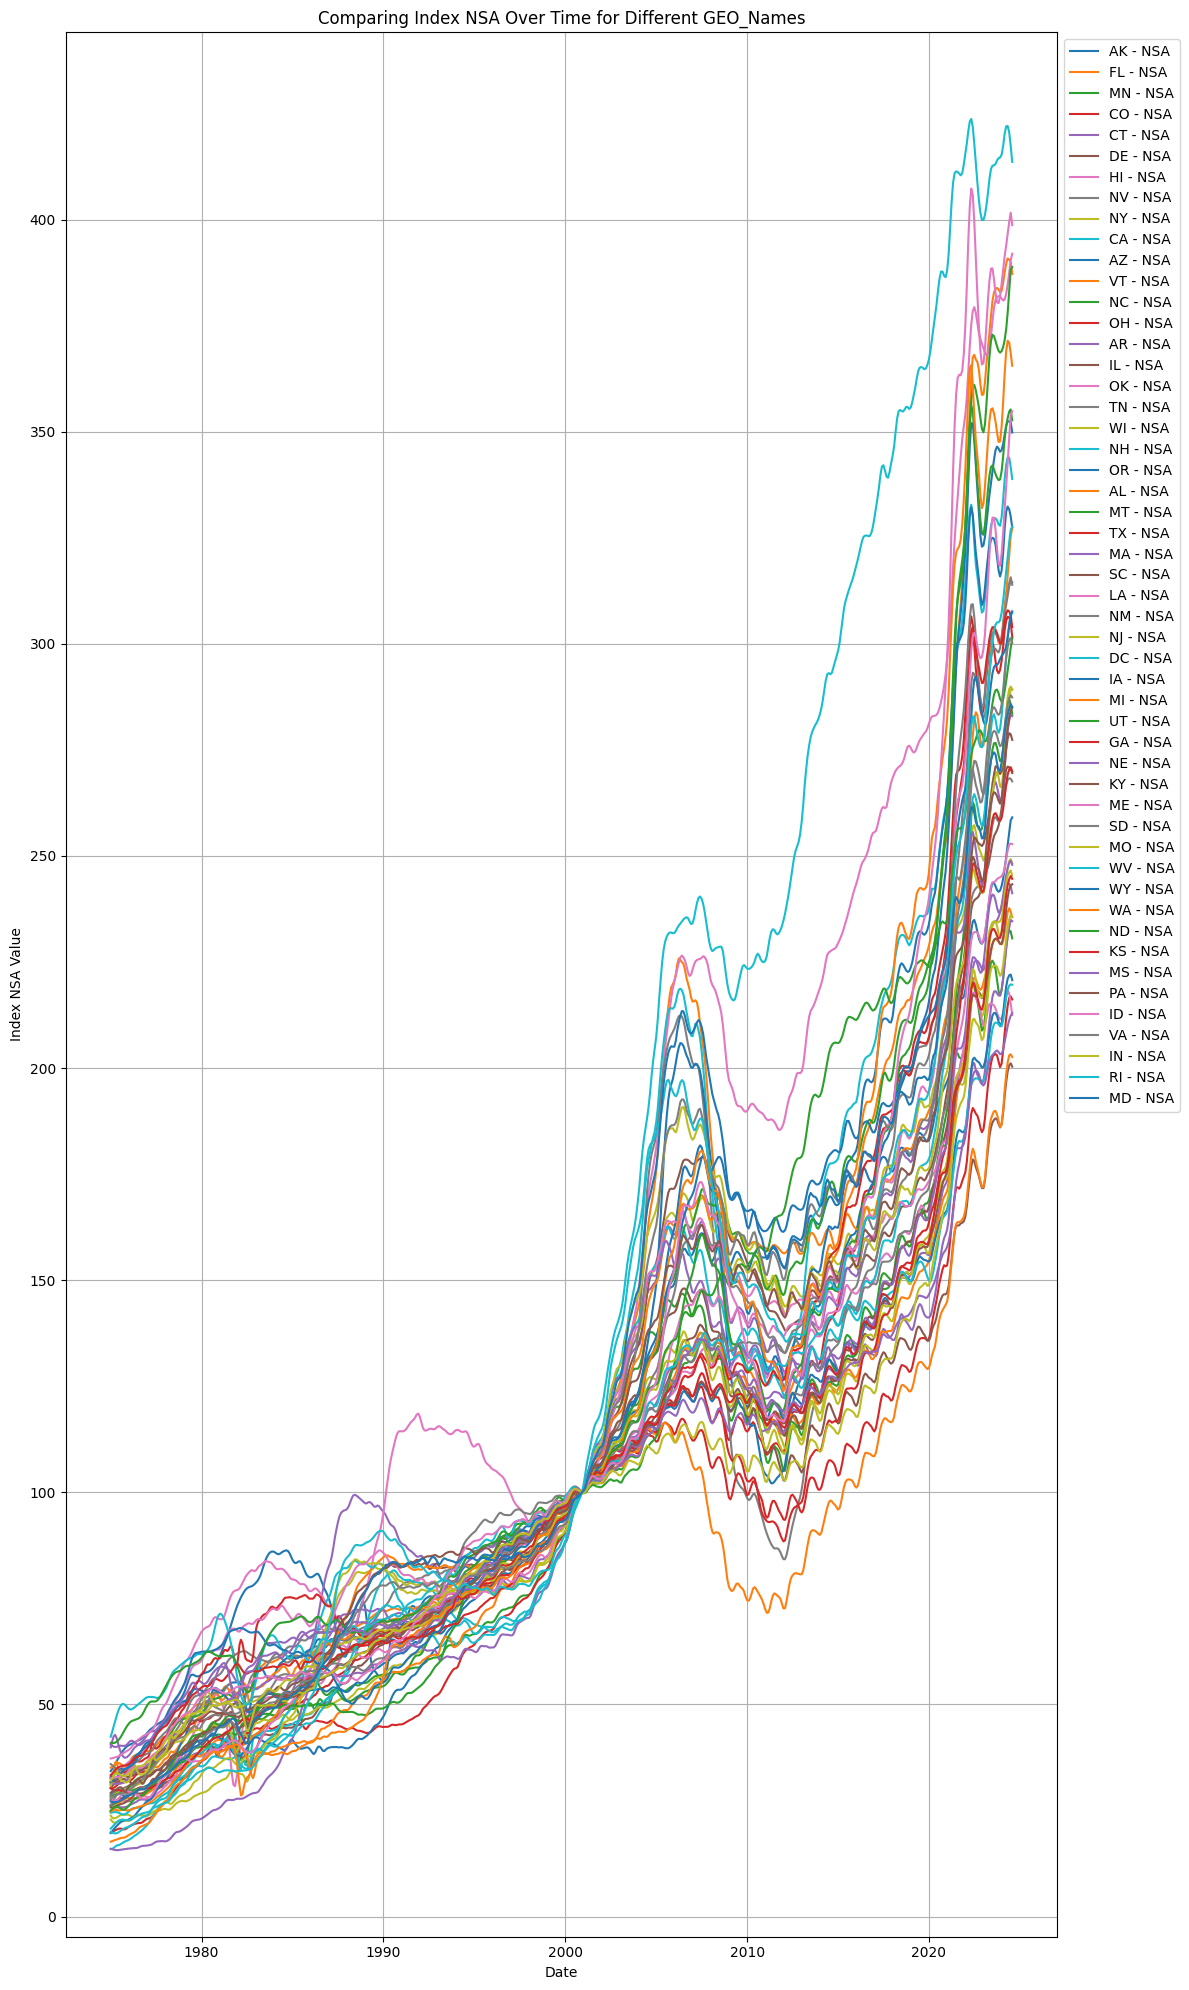

In [9]:
# Step 8: Plotting multiple GEO_Names in the same plot for comparison
plt.figure(figsize=(12, 20))

# Step 9: Loop over unique GEO_Names and plot their data on the same graph
# Get unique GEO_Name values
unique_geo_names = geo_filtered.select('GEO_Name').unique()

# Loop through each unique GEO_Name
for geo_name in unique_geo_names['GEO_Name'].to_list():
    # Filter the data for the current geo_name using .filter()
    geo_data = geo_filtered.filter(pl.col('GEO_Name') == geo_name)
    
    # Plot the 'Index_NSA' values over 'Date'
    plt.plot(geo_data['Date'].to_pandas(), geo_data['Index_NSA'].to_pandas(), label=f"{geo_name} - NSA")

# Step 10: Set up the plot labels and title
plt.xlabel('Date')
plt.ylabel('Index NSA Value')
plt.title('Comparing Index NSA Over Time for Different GEO_Names')

# Step 11: Add a legend and adjust the layout
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

# Step 12: Show the plot
plt.show()


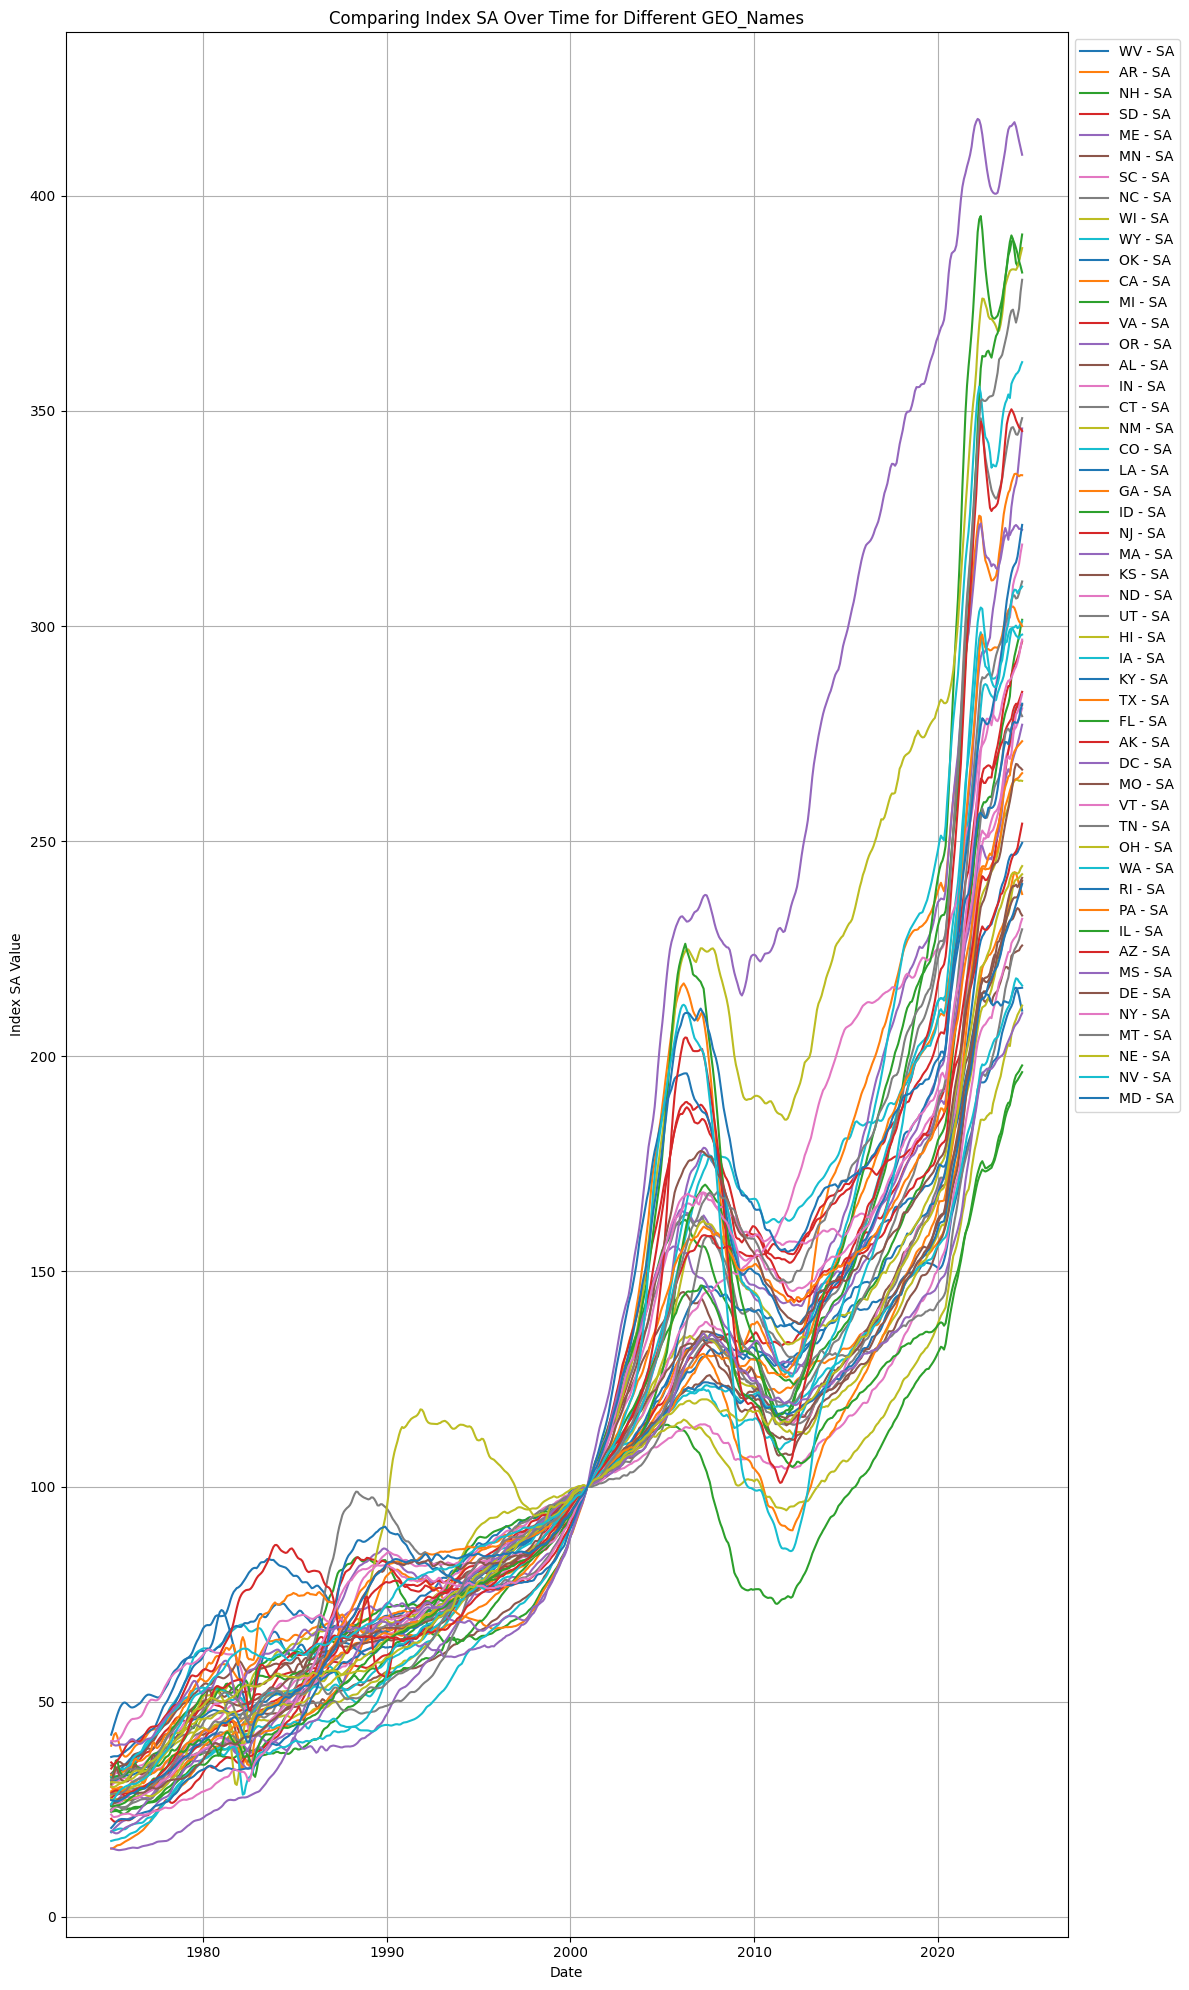

In [10]:
# Step 13: Plotting multiple GEO_Names in the same plot for comparison
plt.figure(figsize=(12, 20))

# Step 14: Loop over unique GEO_Names and plot their data on the same graph
# Get unique GEO_Name values
unique_geo_names = geo_filtered.select('GEO_Name').unique()

# Loop through each unique GEO_Name
for geo_name in unique_geo_names['GEO_Name'].to_list():
    # Filter the data for the current geo_name using .filter()
    geo_data = geo_filtered.filter(pl.col('GEO_Name') == geo_name)
    
    # Plot the 'Index_NSA' values over 'Date'
    plt.plot(geo_data['Date'].to_pandas(), geo_data['Index_SA'].to_pandas(), label=f"{geo_name} - SA")

# Step 15: Set up the plot labels and title
plt.xlabel('Date')
plt.ylabel('Index SA Value')
plt.title('Comparing Index SA Over Time for Different GEO_Names')

# Step 16: Add a legend and adjust the layout
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

# Step 17: Show the plot
plt.show()